Машинное обучение редко ограничивается одиночными моделями. В реальном мире
данные сложны, неоднородны и полны скрытых закономерностей, которые одна модель
может просто не уловить. Представьте себе группу экспертов, каждый из которых делает
своё предсказание на основе ограниченного объёма информации. По отдельности они
могут ошибаться, но если объединить их мнения, общий прогноз окажется значительно
точнее. Этот принцип лежит в основе ансамблевых методов.

Ансамбли — это способ повысить точность предсказаний, используя несколько
моделей одновременно. Вместо того чтобы полагаться на единственное решение,
алгоритмы комбинируют множество слабых моделей, превращая их в мощный инструмент
анализа. Такой подход позволяет уменьшить разброс предсказаний, снизить вероятность
ошибки и улучшить обобщающую способность. Если отдельная модель может
переобучиться на данных или упустить важные детали, ансамбль способен
компенсировать её слабые стороны.

Один из наиболее известных методов ансамблирования — случайный лес. Он
представляет собой коллекцию деревьев решений, каждое из которых учится на случайной
части данных и голосует за итоговый результат. Такой механизм делает предсказания
более устойчивыми и уменьшает влияние выбросов. Но иногда требуется ещё более
точный метод, способный адаптироваться к сложным зависимостям в данных. В таких
случаях используют бустинг, который обучает модели последовательно, исправляя ошибки
предыдущих предсказателей.

Современные реализации бустинга, такие как XGBoost, LightGBM и CatBoost, стали
стандартом в задачах предсказательного моделирования. Эти алгоритмы позволяют
строить быстрые, точные и мощные модели, которые применяются в финансах,
биоинформатике, анализе текстов и многих других областях. Они не просто повышают
точность, но и предлагают механизмы контроля за переобучением, оптимизации
вычислений и работы с различными типами данных.

Ансамбли изменили представление о возможностях машинного обучения, сделав
простые модели основой для сложных, но эффективных решений. Их применение
позволяет решать задачи, где стандартные алгоритмы оказываются бессильны, и
добиваться высокой точности даже в самых сложных условиях.

Принципы работы ансамблей моделей

Ансамблевые методы в машинном обучении основаны на простой, но мощной идее:
объединение нескольких моделей позволяет получить более точные и стабильные
предсказания, чем использование одной модели в одиночку. Это похоже на ситуацию,
когда для решения сложной задачи вы обращаетесь не к одному эксперту, а к группе
специалистов. Каждый из них может предложить свою точку зрения, и, объединив их
мнения, вы получаете более взвешенное и надёжное решение.

Основной принцип ансамблей заключается в том, что разные модели, обученные на
одной задаче, могут ошибаться по-разному. Одна модель может недооценивать значения в
определённых случаях, другая — переоценивать, и если их объединить, ошибки отдельных
моделей могут "сгладиться", что приведёт к более точному общему результату. Это
особенно полезно в задачах с высокими шумами или сложными зависимостями в данных.
Существует два ключевых подхода к созданию ансамблей: бэггинг и бустинг. Они
используют разные стратегии комбинирования моделей и работают по разным принципам.

Бэггинг (bagging) — это метод, при котором несколько одинаковых моделей
обучаются на разных подмножествах исходных данных. Каждое подмножество выбирается
случайным образом с возвращением, что означает, что одна и та же точка может попасть в
разные выборки несколько раз. После обучения каждая модель делает своё предсказание,
а итоговый результат формируется путём голосования (в задачах классификации) или
усреднения (в задачах регрессии). Классическим примером бэггинга является случайный
лес — ансамбль деревьев решений, каждое из которых обучается на случайной части
данных и использует случайный набор признаков для разделения на каждом узле дерева.
Такой подход уменьшает переобучение и делает итоговую модель более стабильной.

Для примера представьте себе задачу предсказания стоимости квартир. Если
обучить одно дерево решений, оно может переобучиться, слишком точно подстроившись
под данные и теряя способность к обобщению. Но если создать десятки деревьев, каждое
из которых видит немного разные данные и принимает решения по-своему, их усреднённое
предсказание окажется более точным и устойчивым к выбросам.

Пример кода на Python с использованием библиотеки `scikit-learn`, который
демонстрирует разницу между одиночным деревом решений и случайным лесом для
задачи предсказания стоимости квартир:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Создадим синтетический набор данных
X, y = make_regression(n_samples=500, n_features=5, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Одиночное дерево решений
single_tree = DecisionTreeRegressor(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [4]:
# Случайный лес
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)

In [5]:
# Сравнение результатов
print(f"Среднеквадратичная ошибка (Decision Tree): {mse_tree:.2f}")
print(f"Среднеквадратичная ошибка (Random Forest): {mse_forest:.2f}")

Среднеквадратичная ошибка (Decision Tree): 3964.19
Среднеквадратичная ошибка (Random Forest): 1288.76


C:\Users\Andrey\AppData\Local\Temp\ipykernel_23516\3808684767.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='white')


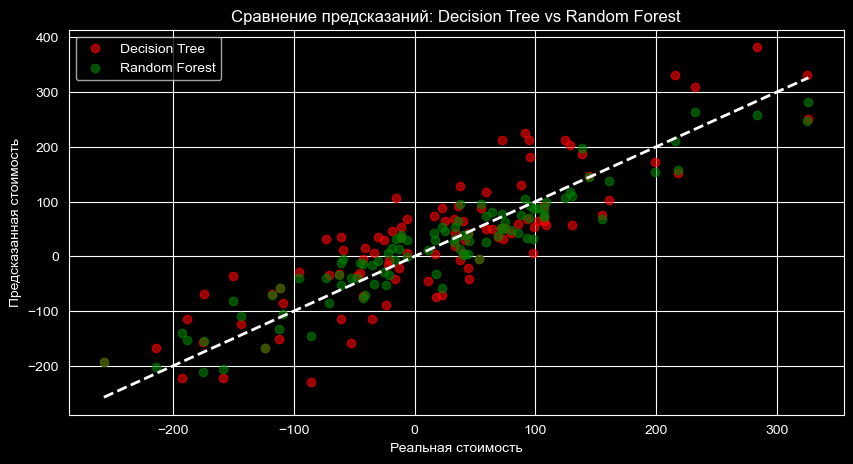

In [8]:
# Визуализация предсказаний
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_tree, color='red', label='Decision Tree', alpha=0.6)
plt.scatter(y_test, y_pred_forest, color='green', label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='white')
plt.xlabel('Реальная стоимость')
plt.ylabel('Предсказанная стоимость')
plt.title('Сравнение предсказаний: Decision Tree vs Random Forest')
plt.legend()
plt.show()

Как работает этот код?
1. Генерация данных: Используем синтетические данные для имитации задачи
предсказания стоимости квартир.
2. Одиночное дерево решений: Строим одно дерево и смотрим на результат. Оно склонно к
переобучению и может плохо обобщать данные.
3. Случайный лес: Строим ансамбль из 100 деревьев. За счёт усреднения предсказаний
уменьшается переобучение и повышается стабильность модели.
4. Оценка качества: Сравниваем среднеквадратичную ошибку (MSE) для одиночного
дерева и случайного леса.
5. Визуализация: На графике видно, как предсказания случайного леса ближе к реальным
значениям по сравнению с одиночным деревом.

Этот пример наглядно демонстрирует, как ансамбли могут улучшить качество
модели и сделать предсказания более устойчивыми.

Бустинг (boosting) работает по другому принципу. Здесь модели обучаются
последовательно: каждая новая модель пытается исправить ошибки предыдущей. Сначала
обучается простая модель, которая делает первые предсказания. Далее следующая
модель фокусируется именно на тех примерах, где первая ошиблась, пытаясь
минимизировать допущенные промахи. Этот процесс повторяется, и каждая новая модель
"усиливает" ансамбль, делая его всё более точным. В итоге ансамбль состоит из
множества слабых моделей (например, небольших деревьев решений), которые по
отдельности не дают выдающихся результатов, но в совокупности формируют мощную
систему.

Возьмём тот же пример с квартирами. Первая модель может предсказать
стоимость примерно, но ошибиться, например, в районах с нестандартными ценами.
Вторая модель "заметит" эти ошибки и сосредоточится именно на них. Третья модель — на
оставшихся недочётах. Постепенно ансамбль учится всё лучше справляться даже с
наиболее сложными случаями. Итоговое предсказание — это взвешенная сумма всех
индивидуальных предсказаний.

Пример кода на Python, демонстрирующий принцип бустинга с использованием
библиотеки `scikit-learn` и алгоритма Gradient Boosting Regressor для предсказания
стоимости квартир:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [10]:
# Создадим синтетический набор данных для регрессии
X, y = make_regression(n_samples=500, n_features=5, noise=30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Инициализируем градиентный бустинг
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [12]:
# Предсказания модели
y_pred = gbr.predict(X_test)

In [13]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (Gradient Boosting): {mse:.2f}")

Среднеквадратичная ошибка (Gradient Boosting): 1464.48


C:\Users\Andrey\AppData\Local\Temp\ipykernel_23516\586879211.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='white')


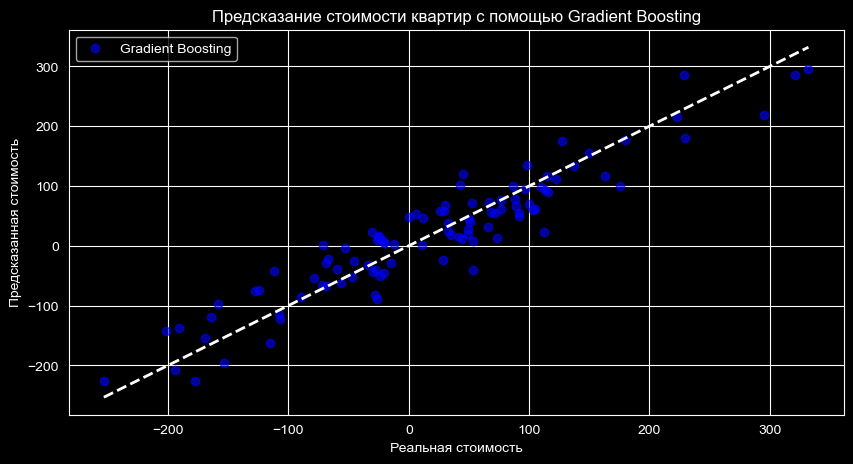

In [15]:
# Визуализация предсказаний
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,color='white')
plt.xlabel('Реальная стоимость')
plt.ylabel('Предсказанная стоимость')
plt.title('Предсказание стоимости квартир с помощью Gradient Boosting')
plt.legend()
plt.show()

Как работает этот код?
1. Генерация данных: Создаём синтетический датасет, который имитирует задачу
предсказания стоимости квартир.
2. Градиентный бустинг: Модель строит 100 слабых деревьев решений. Каждое следующее
дерево сосредотачивается на ошибках предыдущих, постепенно улучшая точность
ансамбля.
- `n_estimators=100` — количество деревьев.
- `learning_rate=0.1` — шаг обновления (меньшее значение даёт более стабильную модель).
- `max_depth=3` — глубина деревьев, чтобы избежать переобучения.
3. Оценка модели: Используем метрику Среднеквадратичная ошибка (MSE) для оценки
качества предсказаний.
4. Визуализация: Строим график, чтобы увидеть, как предсказания модели соответствуют
реальным значениям. Чем ближе точки к диагонали — тем точнее модель.

Почему бустинг эффективен?

Каждое дерево в ансамбле исправляет ошибки предыдущих. Это позволяет модели
учиться на сложных и "проблемных" примерах. В итоге получается мощный инструмент,
способный улавливать сложные зависимости в данных и обеспечивать высокую точность
предсказаний.